In [3]:
import matplotlib.pyplot as plt
import numpy as np

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua import QuantumInstance, aqua_globals
#from qiskit.utils import aqua_globals
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

seed = 10599
aqua_globals.random_seed = seed

E:\DevelopmentEnvironments\Anaconda3\envs\qiskit25\lib\site-packages\qiskit\ml\__init__.py:40: DeprecationWarning: The package qiskit.ml is deprecated. It was moved/refactored to qiskit_machine_learning (pip install qiskit-machine-learning). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_package('ml', 'qiskit_machine_learning', 'qiskit-machine-learning')


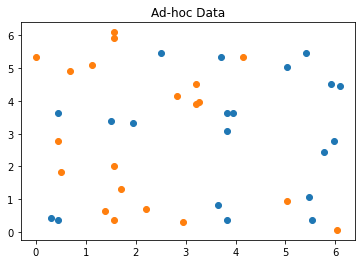

{'A': 0, 'B': 1}


In [4]:
from qiskit.ml.datasets import ad_hoc_data, sample_ad_hoc_data

feature_dim = 2
sample_total, training_input, test_input, class_labels = ad_hoc_data(
    training_size=20,
    test_size=10,
    n=feature_dim,
    gap=0.3,
    plot_data=True
)
extra_test_data = sample_ad_hoc_data(sample_total, 10, n=feature_dim)
datapoints, class_to_label = split_dataset_to_data_and_labels(extra_test_data)
print(class_to_label)

In [5]:
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_input, test_input, datapoints[0])

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

result = qsvm.run(quantum_instance)

print(f'Testing success ratio: {result["testing_accuracy"]}')
print()
print('Prediction from datapoints set:')
print(f'  ground truth: {map_label_to_class_name(datapoints[1], qsvm.label_to_class)}')
print(f'  prediction:   {result["predicted_classes"]}')
predicted_labels = result["predicted_labels"]
print(f'  success rate: {100*np.count_nonzero(predicted_labels == datapoints[1])/len(predicted_labels)}%')

E:\DevelopmentEnvironments\Anaconda3\envs\qiskit25\lib\site-packages\qiskit\aqua\algorithms\classifiers\qsvm\qsvm.py:102: DeprecationWarning: The package qiskit.aqua.algorithms.classifiers is deprecated. It was moved/refactored to qiskit_machine_learning.algorithms.classifiers (pip install qiskit-machine-learning). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_package('aqua.algorithms.classifiers',
E:\DevelopmentEnvironments\Anaconda3\envs\qiskit25\lib\site-packages\qiskit\aqua\quantum_instance.py:135: DeprecationWarning: The class qiskit.aqua.QuantumInstance is deprecated. It was moved/refactored to qiskit.utils.QuantumInstance (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_class('aqua.QuantumInstance',


MissingOptionalLibraryError: "The 'CVXPY' library is required to use 'optimize_svm'. You can install it with 'pip install 'qiskit-aqua[cvx]''.  No module named 'cvxpy'."

In [6]:
from qiskit.aqua.algorithms import SklearnSVM

result = SklearnSVM(training_input, test_input, datapoints[0]).run()

print(f'Testing success ratio: {result["testing_accuracy"]}')
print()
print('Prediction from datapoints set:')
print(f'  ground truth: {map_label_to_class_name(datapoints[1], qsvm.label_to_class)}')
print(f'  prediction:   {result["predicted_classes"]}')
predicted_labels = result["predicted_labels"]
print(f'  success rate: {100*np.count_nonzero(predicted_labels == datapoints[1])/len(predicted_labels)}%')

kernel_matrix = result['kernel_matrix_training']
plt.imshow(np.asmatrix(kernel_matrix), interpolation='nearest', origin='upper', cmap='bone_r');

MissingOptionalLibraryError: "The 'CVXPY' library is required to use 'optimize_svm'. You can install it with 'pip install 'qiskit-aqua[cvx]''.  No module named 'cvxpy'."

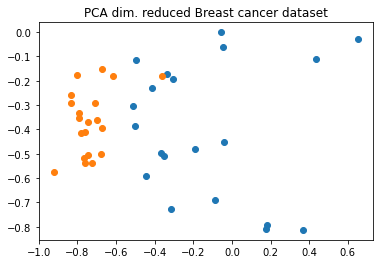

In [5]:
#The breast cancer dataset
#Now we run our algorithm with a real-world dataset: the breast cancer dataset, we use the first two principal components as features.

from qiskit.ml.datasets import breast_cancer

feature_dim = 2
sample_total, training_input, test_input, class_labels = breast_cancer(
    training_size=20,
    test_size=10,
    n=feature_dim,
    plot_data=True
)



In [6]:
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_input, test_input)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

result = qsvm.run(quantum_instance)

print(f'Testing success ratio: {result["testing_accuracy"]}')

MissingOptionalLibraryError: "The 'CVXPY' library is required to use 'optimize_svm'. You can install it with 'pip install qiskit-aqua[cvx]'."

In [7]:
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')

NameError: name 'result' is not defined

In [8]:
result = SklearnSVM(training_input, test_input).run()

print(f'Testing success ratio: {result["testing_accuracy"]}')

kernel_matrix = result['kernel_matrix_training']
plt.imshow(np.asmatrix(kernel_matrix), interpolation='nearest', origin='upper', cmap='bone_r');

MissingOptionalLibraryError: "The 'CVXPY' library is required to use 'optimize_svm'. You can install it with 'pip install qiskit-aqua[cvx]'."

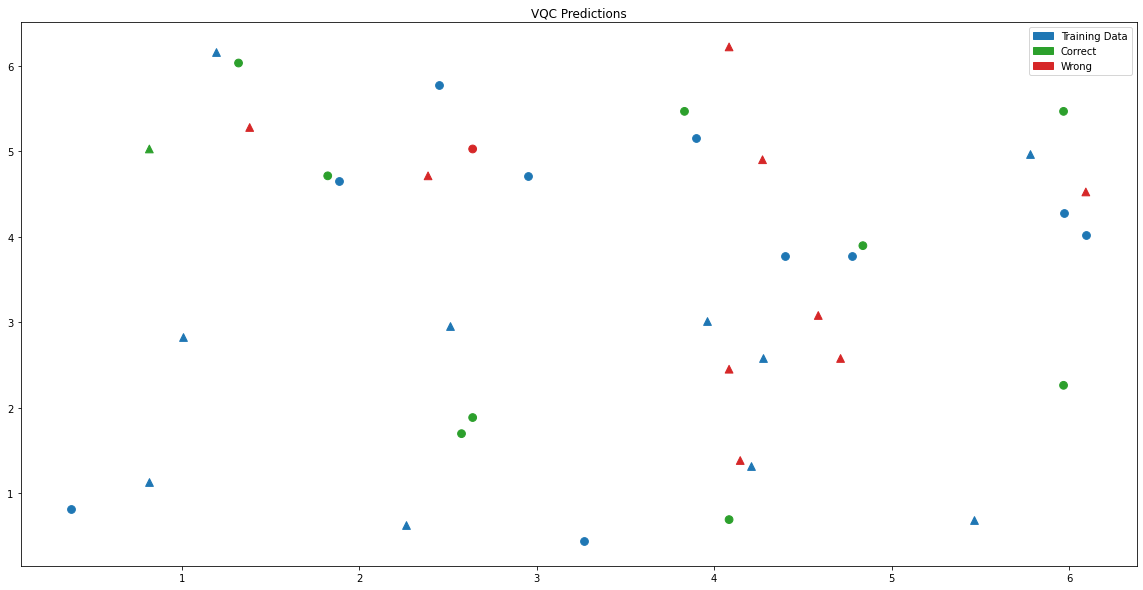

In [17]:
plt.figure(figsize=(20,10))
plt.title('VQC Predictions')
plt.scatter(points_A[:,0],points_A[:,1],s=60, marker='o', 
            color=['tab:green' if label==0 else 'tab:red' for label in predicted_A])
plt.scatter(points_B[:,0],points_B[:,1],s=60, marker='^', 
            color=['tab:green' if label==1 else 'tab:red' for label in predicted_A])

for marker, (label, data) in zip(markers,train.items()):
    plt.scatter(data[:,0],data[:,1], color='tab:blue',label=label, s=60, marker=marker)

train =  mpatches.Patch(color='tab:blue', label='Training Data')   
correct = mpatches.Patch(color='tab:green', label='Correct')
error = mpatches.Patch(color='tab:red', label='Wrong')
plt.legend(handles=[train, correct, error])
